Main simulator

In [1]:
# # This is to see if the values are exporting correctly or not

# from input_variables import SetupParameters

# def main():
#     # Use default parameters
#     default_params = SetupParameters()
#     print("Default parameters:")
#     print(f"Grid size: {default_params.nx}x{default_params.ny}")
#     print(f"Domain size: {default_params.lx}x{default_params.ly}")
#     print(f"Reynolds number: {default_params.reynolds_number}")
#     print(f"Element length: {default_params.dx}x{default_params.dy}")

#     # Use custom parameters
#     custom_params = SetupParameters(nx=100, ny=100, lx=5, ly=5, reynolds_number=50000)
#     print("\nCustom parameters:")
#     print(f"Grid size: {custom_params.nx}x{custom_params.ny}")
#     print(f"Domain size: {custom_params.lx}x{custom_params.ly}")
#     print(f"Reynolds number: {custom_params.reynolds_number}")
#     print(f"Element length: {custom_params.dx}x{custom_params.dy}")

#     # Use parameters from a dictionary
#     param_dict = {
#         'nx': 200,
#         'ny': 200,
#         'lx': 10,
#         'ly': 10,
#         'reynolds_number': 100000,
#         'extra_param': 'This will be ignored'
#     }
#     dict_params = SetupParameters.from_dict(param_dict)
#     print("\nParameters from dictionary:")
#     print(f"Grid size: {dict_params.nx}x{dict_params.ny}")
#     print(f"Domain size: {dict_params.lx}x{dict_params.ly}")
#     print(f"Reynolds number: {dict_params.reynolds_number}")

#     # Access derived parameters
#     print(f"\nDerived parameters for custom setup:")
#     print(f"dx: {custom_params.dx}")
#     print(f"dy: {custom_params.dy}")
#     print(f"alpha: {custom_params.alpha}")
#     print(f"gamma: {custom_params.gamma}")
#     print(f"sigma: {custom_params.sigma}")

# if __name__ == "__main__":
#     main()


Mesh Grid Information:
X shape: (41, 41)
Y shape: (41, 41)
dx: 0.05
dy: 0.05
X range: 0.0 to 2.0
Y range: 0.0 to 2.0


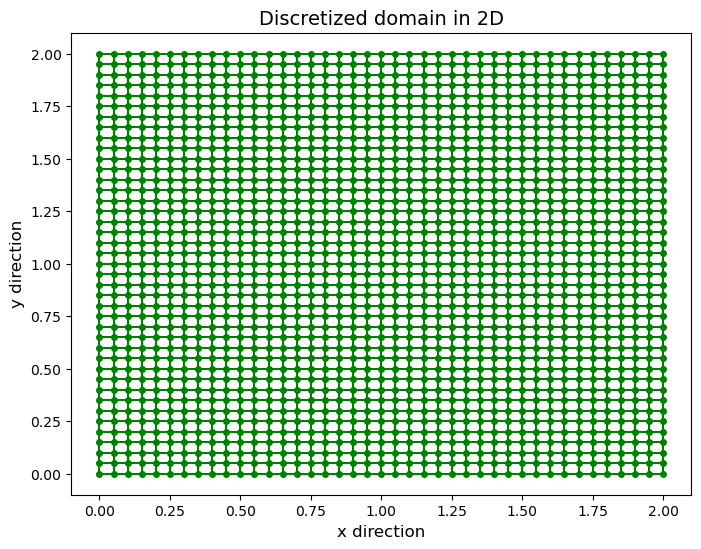

In [2]:
# This was for mesh debugging

import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from input_variables import SetupParameters
from grid import MeshGrid

def main(): # this is my main function
    params= SetupParameters(nx=41, ny=41, lx=2, ly=2, nt=5000, dt=0.0001, nu=0.1, rho_fluid=1, beta=0.0034)

    # Initialize mesh grid
    X, Y, dx, dy = MeshGrid.mesh(params.nx, params.ny, params.lx, params.ly)
    # X, Y, dx, dy = create_mesh_grid(params.nx, params.ny, params.lx, params.ly)
    
    print("\nMesh Grid Information:")
    print(f"X shape: {X.shape}")
    print(f"Y shape: {Y.shape}")
    print(f"dx: {dx}")
    print(f"dy: {dy}")
    print(f"X range: {X.min()} to {X.max()}")
    print(f"Y range: {Y.min()} to {Y.max()}")

    # Plot the mesh grid
    MeshGrid.mesh_plot(X, Y)

if __name__ == "__main__":
    main()

In [3]:
# # See how matrix initialization module work

# import numpy as np
# from tqdm import tqdm

# from input_variables import SetupParameters
# from grid import MeshGrid
# from difference_equations import DiscretizationSchemes
# from matrix_init import MatrixInitializer
# from physics import *
# from boundary_conditions import BCs

# def main(): # this is my main function
#     params= SetupParameters(nx=41, ny=41, lx=2, ly=2, nt=5000, dt=0.0001, nu=0.1, rho_fluid=1, beta=0.0034)
#     ux_prev = MatrixInitializer.matrix_initialization(params.nx, params.ny, zero_initialization=False,initial_value=0)
    
#     print(ux_prev)
        
    
# if __name__ =="__main__":
#     main()

# Physics Module

# Advection-Diffusion and Pressure Solver

This notebook explains the mathematical representation of the advection-diffusion equations and the pressure solver, and verifies the correctness of the implementation.

## Temperature Advection

The temperature advection equation is implemented as:

$$ T_{\text{next}} = T + \Delta t \left( - (u_x \cdot \Delta t / \Delta x + u_y \cdot \Delta t / \Delta y) + \nu \cdot \nabla^2 T \right) $$

This updates the temperature field $T$ using the velocity fields $u_x$ and $u_y$, time step $\Delta t$, grid spacings $\Delta x$ and $\Delta y$, and the Laplacian of $T$.

## Horizontal Velocity Prediction

The horizontal velocity prediction equation is:

$$ u_{x_{\text{half}}} = u_x + \Delta t \left( - (u_x \cdot \frac{\partial u_x}{\partial x} + u_y \cdot \frac{\partial u_x}{\partial y}) + \nu \cdot \nabla^2 u_x \right) $$

This predicts the horizontal velocity field using the current velocities, their derivatives, the Laplacian, and the viscosity $\nu$.

## Vertical Velocity Prediction

The vertical velocity prediction equation is:

$$ u_{y_{\text{half}}} = u_y + \Delta t \left( - (u_x \cdot \frac{\partial u_y}{\partial x} + u_y \cdot \frac{\partial u_y}{\partial y}) + \nu \cdot \nabla^2 u_y \right) $$

This predicts the vertical velocity field using the current velocities, their derivatives, the Laplacian, and the viscosity $\nu$.

## Pressure Poisson Equation solve using jacobi method

The pressure solver equation is:

$$ p_{\text{next}}(i,j) = \frac{1}{4} \left( p(i-1,j) + p(i+1,j) + p(i,j-1) + p(i,j+1) - \Delta x^2 \cdot \text{rhs}(i,j) \right) $$

This iteratively solves the Poisson equation for the pressure field using the right-hand side (rhs) and grid spacing $\Delta x$.

## Pressure Poission explanation:
The Jacobi method is an iterative technique commonly used to solve the pressure Poisson equation in the context of computational fluid dynamics, particularly when implementing the projection method for solving the Navier-Stokes equations. Here's some context on using the Jacobi method for the pressure Poisson equation:
Formulation: The pressure Poisson equation is derived from the incompressibility condition of the fluid. In discretized form, it can be written as a system of linear equations that need to be solved to obtain the pressure field.
Iterative approach: The Jacobi method is an iterative solver that starts with an initial guess for the pressure field and progressively refines it through successive iterations.
Algorithm: For each grid point (i,j), the Jacobi method updates the pressure value using the following formula:
P(i,j,new) = (P(i-1,j) + P(i+1,j) + P(i,j-1) + P(i,j+1) + b(i,j)) / 4
where P represents pressure, and b(i,j) is the source term derived from the divergence of the intermediate velocity field.
Convergence: The iteration continues until the difference between successive approximations falls below a specified tolerance level.
Boundary conditions: Proper implementation of boundary conditions is crucial for the accuracy of the solution. These can include Dirichlet (fixed value) or Neumann (fixed gradient) conditions.
Performance considerations:
The Jacobi method is simple to implement but converges relatively slowly, especially for large grids.
It typically requires O(N) iterations to converge, where N is the number of grid points.
Despite its slow convergence, it forms the basis for more advanced methods like Gauss-Seidel and Successive Over-Relaxation (SOR).
Parallelization: The Jacobi method is inherently parallelizable, as each new pressure value can be computed independently of others in the same iteration.
Adaptations: Recent research has explored ways to improve the Jacobi method's performance, such as using neuroevolution techniques to adapt the method for cases with density discontinuities.

## Pressure Posson Equation solve using jacobi method explanation 
To solve for pressure in the Navier-Stokes equations, we need to address the incompressibility condition, which ensures that the velocity field is divergence-free:

$$ \nabla \cdot \vec{v} = 0 $$

Here’s a step-by-step outline of a common approach, called the **Projection Method**, to solve for pressure:

### 1. Predictor Step: Compute Intermediate Velocity

First, compute an intermediate velocity field \(\vec{v}^*\) that does not yet satisfy the incompressibility condition:

$$ \frac{\vec{v}^* - \vec{v}^n}{\Delta t} = -(\vec{v}^n \cdot \nabla) \vec{v}^n + \nu \nabla^2 \vec{v}^n $$

Rewriting, we have:

$$ \vec{v}^* = \vec{v}^n + \Delta t \left[ -(\vec{v}^n \cdot \nabla) \vec{v}^n + \nu \nabla^2 \vec{v}^n \right] $$

This step involves only the convective and viscous terms.

### 2. Corrector Step: Project the Intermediate Velocity

Next, correct \(\vec{v}^*\) to obtain the divergence-free velocity \(\vec{v}^{n+1}\) by solving for the pressure \(p^{n+1}\):

$$ \vec{v}^{n+1} = \vec{v}^* - \Delta t \nabla p^{n+1} $$

To ensure \(\vec{v}^{n+1}\) is divergence-free, we impose the incompressibility condition:

$$ \nabla \cdot \vec{v}^{n+1} = 0 $$

Substituting \(\vec{v}^{n+1}\) into this condition gives:

$$ \nabla \cdot \left( \vec{v}^* - \Delta t \nabla p^{n+1} \right) = 0 $$

Simplifying, we get a Poisson equation for the pressure:

$$ \nabla^2 p^{n+1} = \frac{\nabla \cdot \vec{v}^*}{\Delta t} $$

### 3. Solve the Pressure Poisson Equation

Discretize the Poisson equation using finite differences. For a 2D grid, the discretized form is:

$$ \frac{p_{i+1,j} - 2p_{i,j} + p_{i-1,j}}{\Delta x^2} + \frac{p_{i,j+1} - 2p_{i,j} + p_{i,j-1}}{\Delta y^2} = \frac{\nabla \cdot \vec{v}^*_{i,j}}{\Delta t} $$

### 4. Update Velocity Field

Once the pressure \(p^{n+1}\) is obtained by solving the Poisson equation, update the velocity field:

$$ \vec{v}^{n+1} = \vec{v}^* - \Delta t \nabla p^{n+1} $$

### Implementation Steps:

1. **Initialize**: Set initial conditions for \(\vec{v}\) and \(p\).
2. **Time Loop**: For each time step:
    - Compute intermediate velocity \(\vec{v}^*\).
    - Solve the Poisson equation for \(p^{n+1}\).
    - Correct the velocity field using \(p^{n+1}\).
3. **Boundary Conditions**: Ensure boundary conditions are properly applied for both velocity and pressure.

### Solving the Poisson Equation

The Poisson equation for pressure can be solved using iterative solvers such as:
- Jacobi method
- Gauss-Seidel method
- Successive Over-Relaxation (SOR)
- Conjugate Gradient method (for large systems)

### Example of Solving the Pressure Poisson Equation Using the Jacobi Method

# Solving for Pressure in Navier-Stokes Equations

To solve for pressure in the Navier-Stokes equations, we need to address the incompressibility condition, which ensures that the velocity field is divergence-free:

$$ \nabla \cdot \vec{v} = 0 $$

Here's a step-by-step outline of a common approach, called the **Projection Method**, to solve for pressure:

## 1. Predictor Step: Compute Intermediate Velocity

First, compute an intermediate velocity field $\vec{v}^*$ that does not yet satisfy the incompressibility condition:

$$ \frac{\vec{v}^* - \vec{v}^n}{\Delta t} = -(\vec{v}^n \cdot \nabla) \vec{v}^n + \nu \nabla^2 \vec{v}^n $$

Rewriting, we have:

$$ \vec{v}^* = \vec{v}^n + \Delta t \left[ -(\vec{v}^n \cdot \nabla) \vec{v}^n + \nu \nabla^2 \vec{v}^n \right] $$

This step involves only the convective and viscous terms.

## 2. Corrector Step: Project the Intermediate Velocity

Next, correct $\vec{v}^*$ to obtain the divergence-free velocity $\vec{v}^{n+1}$ by solving for the pressure $p^{n+1}$:

$$ \vec{v}^{n+1} = \vec{v}^* - \Delta t \nabla p^{n+1} $$

To ensure $\vec{v}^{n+1}$ is divergence-free, we impose the incompressibility condition:

$$ \nabla \cdot \vec{v}^{n+1} = 0 $$

Substituting $\vec{v}^{n+1}$ into this condition gives:

$$ \nabla \cdot \left( \vec{v}^* - \Delta t \nabla p^{n+1} \right) = 0 $$

Simplifying, we get a Poisson equation for the pressure:

$$ \nabla^2 p^{n+1} = \frac{\nabla \cdot \vec{v}^*}{\Delta t} $$

## 3. Solve the Pressure Poisson Equation

Discretize the Poisson equation using finite differences. For a 2D grid, the discretized form is:

$$ \frac{p_{i+1,j} - 2p_{i,j} + p_{i-1,j}}{\Delta x^2} + \frac{p_{i,j+1} - 2p_{i,j} + p_{i,j-1}}{\Delta y^2} = \frac{\nabla \cdot \vec{v}^*_{i,j}}{\Delta t} $$

## 4. Update Velocity Field

Once the pressure $p^{n+1}$ is obtained by solving the Poisson equation, update the velocity field:

$$ \vec{v}^{n+1} = \vec{v}^* - \Delta t \nabla p^{n+1} $$

## Implementation Steps:

1. **Initialize**: Set initial conditions for $\vec{v}$ and $p$.
2. **Time Loop**: For each time step:
    - Compute intermediate velocity $\vec{v}^*$.
    - Solve the Poisson equation for $p^{n+1}$.
    - Correct the velocity field using $p^{n+1}$.
3. **Boundary Conditions**: Ensure boundary conditions are properly applied for both velocity and pressure.

## Solving the Poisson Equation

The Poisson equation for pressure can be solved using iterative solvers such as:
- Jacobi method
- Gauss-Seidel method
- Successive Over-Relaxation (SOR)
- Conjugate Gradient method (for large systems)

### Example of Solving the Pressure Poisson Equation Using the Jacobi Method

The Jacobi method is a simple iterative method. For each grid point $(i, j)$, update the pressure:

$$ p_{i,j}^{k+1} = \frac{1}{4} \left( p_{i+1,j}^k + p_{i-1,j}^k + p_{i,j+1}^k + p_{i,j-1}^k - \frac{\Delta x^2 \Delta y^2}{2(\Delta x^2 + \Delta y^2)} \cdot \frac{\nabla \cdot \vec{v}^*_{i,j}}{\Delta t} \right) $$

where $k$ denotes the iteration index. Iterate until the solution converges to a desired tolerance.

## Conclusion

By following these steps, you can numerically solve the Navier-Stokes equations for incompressible flow using finite differences. The key is to decouple the velocity and pressure calculations using the projection method, ensuring that the velocity field remains divergence-free.

### Conclusion

By following these steps, you can numerically solve the Navier-Stokes equations for incompressible flow using finite differences. The key is to decouple the velocity and pressure calculations using the projection method, ensuring that the velocity field remains divergence-free.

## Velocity Correction

The velocity correction equation is:

$$ u_{x_{\text{next}}} = u_{x_{\text{half}}} - \Delta t \cdot \frac{1}{\rho_{\text{fluid}}} \cdot \frac{\partial p}{\partial x} $$

This corrects the horizontal velocity using the pressure gradient, fluid density $\rho_{\text{fluid}}$, and time step $\Delta t$.

## Verification

### Temperature Advection
- **Correct**: The implementation correctly follows the advection-diffusion equation for temperature.

### Horizontal Velocity Prediction
- **Correct**: The implementation correctly follows the advection-diffusion equation for horizontal velocity.

### Vertical Velocity Prediction
- **Correct**: The implementation correctly follows the advection-diffusion equation for vertical velocity.

### Pressure Solver
- **Correct**: The implementation uses a standard iterative solver (Jacobi iteration) for the Poisson equation.

### Velocity Correction
- **Correct**: The implementation correctly applies the pressure gradient to update the horizontal velocity.

## Conclusion

The code implementation is correct based on the mathematical representations. Each method correctly represents the corresponding physical equations for advection, diffusion, and pressure correction.

Solving pressure-possion equation using jacobi method simple code

Converged after 1 iterations


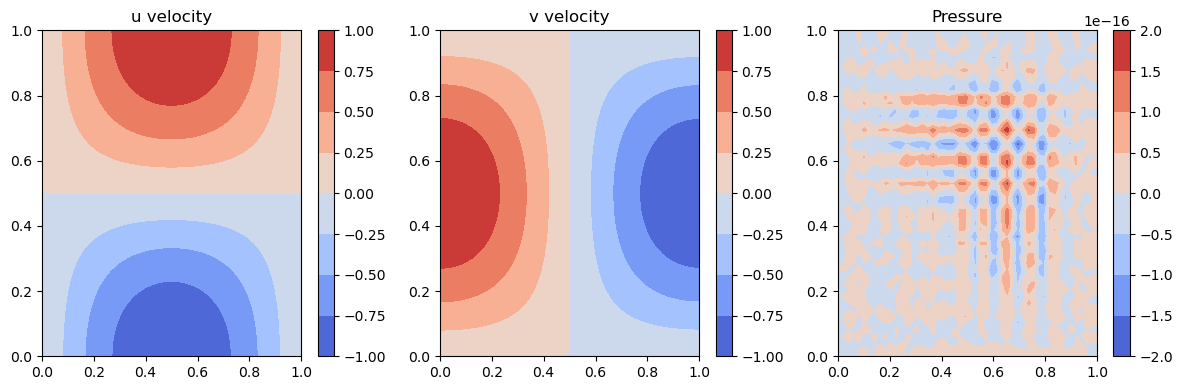

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def jacobi_poisson_solver(u, v, dx, dy, dt, rho, num_iterations=1000, tolerance=1e-5):
    nx, ny = u.shape
    
    # Initialize pressure
    p = np.zeros((nx, ny))
    
    # Calculate divergence of intermediate velocity field
    div = np.zeros((nx, ny))
    div[1:-1, 1:-1] = (
        (u[2:, 1:-1] - u[:-2, 1:-1]) / (2 * dx) +
        (v[1:-1, 2:] - v[1:-1, :-2]) / (2 * dy)
    )
    
    # Calculate b(i,j)
    b = rho * div / dt
    
    # Jacobi iteration
    for iteration in range(num_iterations):
        p_old = p.copy()
        
        # Update pressure
        p[1:-1, 1:-1] = 0.25 * (
            p_old[2:, 1:-1] + p_old[:-2, 1:-1] + 
            p_old[1:-1, 2:] + p_old[1:-1, :-2] - 
            b[1:-1, 1:-1] * dx * dy
        )
        
        # Apply boundary conditions (zero gradient)
        p[0, :] = p[1, :]
        p[-1, :] = p[-2, :]
        p[:, 0] = p[:, 1]
        p[:, -1] = p[:, -2]
        
        # Check for convergence
        if np.max(np.abs(p - p_old)) < tolerance:
            print(f"Converged after {iteration+1} iterations")
            break
    
    return p

# Set up grid and parameters
nx, ny = 50, 50
Lx, Ly = 1.0, 1.0
dx, dy = Lx / (nx - 1), Ly / (ny - 1)
dt = 0.01
rho = 1.0

# Create sample velocity field (e.g., a vortex)
x = np.linspace(0, Lx, nx)
y = np.linspace(0, Ly, ny)
X, Y = np.meshgrid(x, y)
u = -np.sin(np.pi * X) * np.cos(np.pi * Y)
v = np.cos(np.pi * X) * np.sin(np.pi * Y)

# Solve for pressure
p = jacobi_poisson_solver(u, v, dx, dy, dt, rho)

# Plot results
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.contourf(X, Y, u, cmap='coolwarm')
plt.colorbar()
plt.title('u velocity')

plt.subplot(132)
plt.contourf(X, Y, v, cmap='coolwarm')
plt.colorbar()
plt.title('v velocity')

plt.subplot(133)
plt.contourf(X, Y, p, cmap='coolwarm')
plt.colorbar()
plt.title('Pressure')

plt.tight_layout()
plt.show()

Parameters calling and initialization of the main matrices

In [8]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

from input_variables import SetupParameters
from grid import MeshGrid
from difference_equations import DiscretizationSchemes
from matrix_init import MatrixInitializer
from physics import *
from boundary_conditions import BCs
from Visualization import *
from test import *

def main(): # this is my main function
    params= SetupParameters(nx=201, ny=201, lx=2, ly=2, nt=5000, dt=0.0001, nu=0.1, rho_fluid=1, beta=0)
    # print("\nCustom Parameters:")
    # print(f"Grid Size: {params.nx} x {params.ny}")
    # print(f"Domain Size: {params.lx} x {params.ly}")
    # print(f"Element Size: {params.dx} x {params.dy}")
    # print(f"Number of iterations: {params.nt}")
    # print(f"Time Step length: {params.dt}")
    # print(f"Kinematic viscosity: {params.nu}")
    # print(f"Fluid Density: {params.rho_fluid}")
    # print(f"Reynolds number:{params.reynolds_number}")
    # print(f"Prandtl Number: {params.prandtl_number}")
    # print(f"Thermal Expansion of water: {params.beta}")
    # print(f"alpha: {params.alpha}")
    # print(f"gamma: {params.gamma}")
    # print(f"sigma: {params.sigma}")
    

    X, Y, dx, dy = MeshGrid.mesh(params.nx, params.ny, params.lx, params.ly)
    # MeshGrid.mesh_plot(X,Y)
    # print("\nMesh Grid Information:")
    # print(f"X shape: {X.shape}")
    # print(f"Y shape: {Y.shape}")
    # print(f"dx: {dx}")
    # print(f"dy: {dy}")
    # print(f"X range: {X.min()} to {X.max()}")
    # print(f"Y range: {Y.min()} to {Y.max()}")
    
    params.dx = float(dx)
    params.dy = float(dy)
    
    # Initialize matrices
    ux_prev = MatrixInitializer.matrix_initialization(params.nx,params.ny, zero_initialization=False, initial_value=0)
    ux_prev = BCs.velocity_BCx(ux_prev)
    ux_tent = MatrixInitializer.matrix_initialization(params.nx,params.ny, zero_initialization=False, initial_value=0)
    ux_next = MatrixInitializer.matrix_initialization(params.nx,params.ny, zero_initialization=False, initial_value=0)
        
    uy_prev = MatrixInitializer.matrix_initialization(params.nx,params.ny, zero_initialization=False, initial_value=0)
    uy_prev = BCs.velocity_BCy(uy_prev)
    uy_tent = MatrixInitializer.matrix_initialization(params.nx,params.ny, zero_initialization=False, initial_value=0)
    uy_next = MatrixInitializer.matrix_initialization(params.nx,params.ny, zero_initialization=False, initial_value=0)
        
    p_prev = MatrixInitializer.matrix_initialization(params.nx,params.ny, zero_initialization=False, initial_value=0)
    p_prev = BCs.pressure_BCx(p_prev)
    p_tent = MatrixInitializer.matrix_initialization(params.nx,params.ny, zero_initialization=False, initial_value=0)
    p_next = MatrixInitializer.matrix_initialization(params.nx,params.ny, zero_initialization=False, initial_value=0)
    
    if params.beta > 0 :
        T = MatrixInitializer.matrix_initialization(params.nx,params.ny, zero_initialization=False, initial_value=0)
        if params.beta > 0:
            T = BCs.T_BCx(T)
        T_tent = MatrixInitializer.matrix_initialization(params.nx,params.ny, zero_initialization=False, initial_value=0)
        T_next = MatrixInitializer.matrix_initialization(params.nx,params.ny, zero_initialization=False, initial_value=0)
    
    Spin_up = []
    Error = []
    ux_solution_time = []
    uy_solution_time = []
    p_solution_time = []
    T_solution_time = []
    
    # Main time loop
    for _ in tqdm(range(params.nt)):
        # Generating derivative terms for homogenous advection calculation
        dux_prev__dx = DiscretizationSchemes.central_difference_x(ux_prev, params.dx)
        dux_prev__dy = DiscretizationSchemes.central_difference_y(ux_prev, params.dy)
        duy_prev__dx = DiscretizationSchemes.central_difference_x(uy_prev, params.dx)
        duy_prev__dy = DiscretizationSchemes.central_difference_y(uy_prev, params.dy)
        laplace__ux_prev = DiscretizationSchemes.laplacian(ux_prev,params.dx, params.dy)
        laplace__uy_prev = DiscretizationSchemes.laplacian(uy_prev,params.dx, params.dy)
        
        if params.beta > 0:
            laplace_T = DiscretizationSchemes.laplacian(T, params.dx, params.dy)
            dT__dx = DiscretizationSchemes.central_difference_x(T, params.dx)
            dT__dy = DiscretizationSchemes.central_difference_y(T, params.dy)

        # Check Peclet number
        Pe = TestStability.check_peclet_number(ux_prev, uy_prev, params.dx, params.dy, params.nu)

        # Adjust time step
        old_dt = params.dt
        params.dt, cfl = TestStability.test_CFL_number_calculation(ux_prev, uy_prev, params.dx, params.dy, params.dt)        
        params.dt = 0.5 * (old_dt + params.dt)  # More gradual adjustment

        # Here you would add your Navier-Stokes equations solver steps
        # Update matrices['ux_tent'], matrices['uy_tent'], matrices['p_tent'], matrices['T_tent']
        # Then update matrices['ux_next'], matrices['uy_next'], matrices['p_next'], matrices['T_next']
        
        # Perform a tentative step by solving the momentum equation without the pressure gradient
        # nt = TestStability.test_initial_timestep_value(params.dx, params.dt, params.nu, params.sf)
        ux_tent = HomogeneousAdvection.advection_velocity_prediction_horizontal(
            ux_prev, uy_prev, dux_prev__dx, dux_prev__dy, 
            laplace__ux_prev, params.nu, params.dt
        )
        uy_tent = HomogeneousAdvection.advection_velocity_prediction_vertical(
            ux_prev, uy_prev, duy_prev__dx,  duy_prev__dy, laplace__uy_prev,
            params.nu, params.dt
        )
        
        # Velocity Boundary Conditions: Homogeneous Dirichlet BC everywhere
        # except for the horizontal velocity at the top, which is prescribed
        
        ux_tent = BCs.velocity_BCx(ux_tent)
        uy_tent = BCs.velocity_BCy(uy_tent)
        
        if params.beta>0:
            T_next = BCs.T_BCx(T_next)
            
        dux_tent__dx = DiscretizationSchemes.central_difference_x(ux_tent, params.dx)
        duy_tent__dy = DiscretizationSchemes.central_difference_y(uy_tent, params.dy)
        
        # Compute a pressure correction by solving the pressure-poisson equation
        rhs = (params.rho_fluid/params.dt) * (dux_tent__dx + duy_tent__dy)
        # Pressure solver with convergence check
        converged = False
        for _ in range(params.nppi):
            p_next = PressurePoisson.pressure_solver(p_prev, params.dx, rhs, 1)  # Single iteration
            converged = TestStability.test_pressure_poisson_convergence(p_prev, p_next)
            if converged:
                break
            p_prev = p_next.copy()

        if not converged:
            print("Warning: Pressure solution did not converge")
        
        # p_next = PressurePoisson.pressure_solver(p_prev, params.dx, rhs, params.nppi)
        # Move this line to the above convergence criterion
        p_next = BCs.pressure_BCx(p_next)
        
        #Generating derivative terms for velocity correction calculation
        dp_next__dx = DiscretizationSchemes.central_difference_x(p_next, params.dx) 
        dp_next__dy = DiscretizationSchemes.central_difference_y(p_next, params.dy) 
        
        # Correct the velocities such that the fluid stays incompressible
        if params.beta > 0:
            T_next = HomogeneousAdvection.advection_temperature(T, ux_prev, uy_prev, dT__dx, dT__dy, laplace_T, 1, params.dt)
            buoyancy = params.beta * T_next
            T_next = BCs.T_BCx(T_next)
        else:
            buoyancy = 0
            
        ux_next = AdvectionVelocityCorrection.advection_velocity(ux_tent, dp_next__dx, params.rho_fluid, params.dt)
        uy_next = AdvectionVelocityCorrection.advection_velocity(uy_tent, dp_next__dy, params.rho_fluid, params.dt) + buoyancy * params.dt
        
        # Velocity Boundary Conditions: Homogeneous Dirichlet BC everywhere
        # except for the horizontal velocity at the top, which is prescribed
        ux_next = BCs.velocity_BCx(ux_next)
        uy_next = BCs.velocity_BCy(uy_next)   
        if params.beta > 0:
            T_next = BCs.T_BCx(T_next)
        
        Spin_up.append((np.mean(ux_next) - np.mean(ux_prev))/np.mean(ux_prev))
        Error.append((np.sqrt(np.sum((ux_next - ux_prev)**2))/ (params.nx * params.ny)))
        
        # Advance in time
        ux_prev = ux_next
        uy_prev = uy_next
        p_prev = p_next
        if params.beta > 0:
            T = T_next

        # After solving, update 'prev' matrices for next iteration
        ux_solution_time.append(ux_next)
        uy_solution_time.append(uy_next)
        p_solution_time.append(p_next)
        
        if params.beta > 0:
            T_solution_time.append(T_next)
        
        # params.dt = TestStability.test_CFL_number_calculation(ux_next, uy_next, params.dx, params.dy, params.dt) 

            
    # Here you can add post-processing, plotting, or data saving code
    ux_solution_time = np.array(ux_solution_time)
    uy_solution_time = np.array(uy_solution_time)
    p_solution_time = np.array(p_solution_time)
    T_solution_time = np.array(T_solution_time)
    
    # Visual.visualize_contour_plot(X, Y, ux_next)
    # Visual.visualize_vector_plot(X, Y, ux_next, uy_next, True)
    # Visual.visualize_vector_plot(X, Y, ux_next, uy_next, False)
    
    Visual.visualize_Spin_up_plot(Spin_up, params.nt, xlim_pos = params.nt, xlim_neg = 1, ylim_pos =  0.05 , ylim_neg =  -0.05)

if __name__ == "__main__":
    main() 

ModuleNotFoundError: No module named 'Visualization'